In [3]:
import numpy as np
import pandas as pd
import uproot
from pylorentz import Momentum4
import matplotlib.pyplot as plt
m_tau = 1.776

In [4]:
variables_a1_a1_gen = [
    "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
    "dm_1", "dm_2",
    "pi_E_1", "pi_px_1", "pi_py_1", "pi_pz_1",
    "pi_E_2", "pi_px_2", "pi_py_2", "pi_pz_2",
    "pi2_E_1", "pi2_px_1", "pi2_py_1", "pi2_pz_1",
    "pi3_E_1", "pi3_px_1", "pi3_py_1", "pi3_pz_1",
    "pi2_px_2", "pi2_py_2", "pi2_pz_2", "pi2_E_2",
    "pi3_px_2", "pi3_py_2", "pi3_pz_2", "pi3_E_2",
    "sv_x_1", "sv_y_1", "sv_z_1",
    "sv_x_2", "sv_y_2", "sv_z_2",
    "nu_E_1", "nu_px_1", "nu_py_1", "nu_pz_1", 
    "nu_E_2", "nu_px_2", "nu_py_2", "nu_pz_2",]
tree_tt_gen = uproot.open("./MVAFILE_GEN_AllHiggs_tt_new.root")["ntuple"]
df_gen = tree_tt_gen.pandas.df(variables_a1_a1_gen)
df_gen.to_pickle(f"../shared/df_tt_a1_a1_gen.pkl")

In [4]:
df_gen = pd.read_pickle(f"../shared/df_tt_a1_a1_gen.pkl")

In [5]:
df_gen = df_gen[(df_gen['dm_1']==10) & (df_gen['dm_2']==10)]

In [6]:
df_gen = df_gen[(df_gen != 0).all(1)]

In [7]:
df_gen.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,dm_1,dm_2,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,...,sv_y_2,sv_z_2,nu_E_1,nu_px_1,nu_py_1,nu_pz_1,nu_E_2,nu_px_2,nu_py_2,nu_pz_2
entry,,,,,,,,,,,,,,,,,,,,,
4,0.370084,1.765682,1.648769,0.604970,10.0,10.0,5.500041,-4.350674,-2.053902,2.661596,...,0.151155,0.536159,12.439656,-9.956415,-4.771683,5.731132,27.497826,9.285120,6.653428,25.012974
12,0.403054,1.167738,0.118793,0.231651,10.0,10.0,123.374205,-10.398425,-26.224208,-120.105531,...,0.542358,-1.582369,61.721165,-5.279255,-13.060096,-60.092143,81.291194,16.274678,25.851572,-75.333189
15,0.203289,1.797292,0.414664,0.092664,10.0,10.0,41.659845,31.126593,-18.033808,-21.010477,...,0.107171,-0.210013,2.536093,2.057622,-0.939425,-1.146927,9.252467,-4.242394,3.490547,-7.444885
35,0.115375,1.037540,0.438237,0.959867,10.0,10.0,8.222886,3.935378,7.009589,1.724771,...,-0.218105,0.183014,1.649102,0.926538,1.343468,0.236977,11.843902,-2.603359,-9.023032,7.217025
36,0.412547,1.816359,1.537121,0.533256,10.0,10.0,22.797583,-14.755482,16.665252,4.924980,...,-0.101023,-0.196908,8.062246,-5.449784,5.829276,1.148572,18.037537,7.153822,-7.315954,-14.854373


In [8]:
df_gen.keys()

Index(['wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm', 'rand', 'dm_1', 'dm_2', 'pi_E_1',
       'pi_px_1', 'pi_py_1', 'pi_pz_1', 'pi_E_2', 'pi_px_2', 'pi_py_2',
       'pi_pz_2', 'pi2_E_1', 'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi3_E_1',
       'pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2',
       'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 'sv_x_1',
       'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2', 'sv_z_2', 'nu_E_1', 'nu_px_1',
       'nu_py_1', 'nu_pz_1', 'nu_E_2', 'nu_px_2', 'nu_py_2', 'nu_pz_2'],
      dtype='object')

In [47]:
def get_info(df):
    pi_1 = Momentum4(df['pi_E_1'], df['pi_px_1'], df['pi_py_1'], df['pi_pz_1'])
    pi2_1 = Momentum4(df['pi2_E_1'], df['pi2_px_1'], df['pi2_py_1'], df['pi2_pz_1'])
    pi3_1 = Momentum4(df['pi3_E_1'], df['pi3_px_1'], df['pi3_py_1'], df['pi3_pz_1'])
    pi_2 = Momentum4(df['pi_E_2'], df['pi_px_2'], df['pi_py_2'], df['pi_pz_2'])
    pi2_2 = Momentum4(df['pi2_E_2'], df['pi2_px_2'], df['pi2_py_2'], df['pi2_pz_2'])
    pi3_2 = Momentum4(df['pi3_E_2'], df['pi3_px_2'], df['pi3_py_2'], df['pi3_pz_2'])
    nu_1 = Momentum4(df['nu_E_1'], df['nu_px_1'],  df['nu_py_1'], df['nu_pz_1'],)
    nu_2 = Momentum4(df['nu_E_2'], df['nu_px_2'],  df['nu_py_2'], df['nu_pz_2'],)
    a1_1 = pi_1 + pi3_1 + pi2_1
    a1_2 = pi_2 + pi3_2 + pi2_2

    # ip_1 = np.c_[df['ip_x_1'], df['ip_y_1'], df['ip_z_1']]
    sv_1 = np.c_[df['sv_x_1'], df['sv_y_1'], df['sv_z_1']]
    # ip_2 = np.c_[df['ip_x_2'], df['ip_y_2'], df['ip_z_2']]
    sv_2 = np.c_[df['sv_x_2'], df['sv_y_2'], df['sv_z_2']]
    a1_1_p = np.c_[a1_1.p_x, a1_1.p_y, a1_1.p_z]
    a1_2_p = np.c_[a1_2.p_x, a1_2.p_y, a1_2.p_z]

    # tau_vec = np.c_[]

    # found some 0s in a1_1_p - now fixed via cleaning
    a1_1_p_norm = a1_1_p/np.sqrt((a1_1_p ** 2).sum(-1))[..., np.newaxis]
    a1_2_p_norm = a1_2_p/np.sqrt((a1_2_p ** 2).sum(-1))[..., np.newaxis]
    sv_1_norm = sv_1/np.sqrt((sv_1 ** 2).sum(-1))[..., np.newaxis]
    sv_2_norm = sv_2/np.sqrt((sv_2 ** 2).sum(-1))[..., np.newaxis]

    m_1 = a1_1.m
    m_2 = a1_2.m

    theta_1 = np.arccos(np.einsum('ij, ij->i', a1_1_p_norm, sv_1_norm))
    theta_2 = np.arccos(np.einsum('ij, ij->i', a1_2_p_norm, sv_2_norm))
    return m_1, m_2, a1_1, a1_2, theta_1, theta_2, nu_1, nu_2, sv_1_norm, sv_2_norm
m_1, m_2, a1_1, a1_2, theta_1, theta_2, nu_1, nu_2, sv_1_norm, sv_2_norm = get_info(df_gen)

In [11]:
# theta filtering
max_theta_1 = np.arcsin((m_tau**2-m_1**2)/(2*m_tau*a1_1.p))
max_theta_2 = np.arcsin((m_tau**2-m_2**2)/(2*m_tau*a1_2.p))
idx1 = max_theta_1<theta_1
idx2 = max_theta_2<theta_2
theta_1_f = theta_1
theta_2_f = theta_2
theta_1_f[idx1] = max_theta_1[idx1]
theta_2_f[idx2] = max_theta_2[idx2]

<ipython-input-11-3e25df104bc7>:2: RuntimeWarning: invalid value encountered in arcsin
  max_theta_1 = np.arcsin((m_tau**2-m_1**2)/(2*m_tau*a1_1.p))
<ipython-input-11-3e25df104bc7>:3: RuntimeWarning: invalid value encountered in arcsin
  max_theta_2 = np.arcsin((m_tau**2-m_2**2)/(2*m_tau*a1_2.p))


In [12]:
def paper_solution(m, p, theta):
    # p is the magnitude
    a = (m**2+m_tau**2)*p*np.cos(theta)
    d = ((m**2-m_tau**2)**2-4*m_tau**2*p**2*np.sin(theta)**2)
    d = np.round(d, 14) # for floating point error
    b = np.sqrt((m**2+p**2)*d)
    c = 2*(m**2+p**2*np.sin(theta)**2)
    return (a+b)/c, (a-b)/c

def my_solution(m, p, theta):
    a = -4*(m**2+p**2*np.sin(theta)**2)
    b = 8*p**3*np.cos(theta) + 4*p*np.cos(theta)*(m_tau**2-m**2) + 8*p*(m_tau**2+p**2)
#     c = (m**2-m_tau**2)**2-4*p**2*(m**2+m_tau**2)
    c = m_tau**4+m**4+4*p**4-2*m**2*m_tau**2-4*(m**2+p**2)*p**2-4*p**2*(m_tau**2-m**2) 
    return (-b + np.sqrt(b**2-4*a*c))/(2*a), (-b - np.sqrt(b**2-4*a*c))/(2*a)
#     return np.roots([a,b,c])

def test(m, p, theta):
    return ((m**2-m_tau**2)**2-4*m_tau**2*p**2*np.sin(theta)**2)

def wolfram(m, p, theta):
    a = m_tau**2
    b = m**2
    c = m**2+p**2
    d = p
    e = np.cos(theta)
    return (-a**2+b**2-2*c*d+2*d**2)/(2*(e*d-c)), (-a**2+b**2+2*c*d+2*d**2)/(2*(c+e*d))

In [25]:
def get_closest_soln(sol, mode=0):
    m_higgs = 125
    closest_soln = []
    
    for i in range(len(sol)):
        if mode == 0:
            solutions = np.array(sol[i])
            distances = np.abs(solutions-m_higgs)
            try:
                ans = solutions[np.nanargmin(distances)]
            except ValueError as e:
                continue
            closest_soln.append(ans)
    #         closest_soln.append(solutions[np.nanargmin(distances)])
        elif mode == 1:
            closest_soln.append(max(sol[i][0], sol[i][1]))
        elif mode == 2:
            closest_soln.append(min(sol[i][0], sol[i][1]))
        if i%100000==0:
            print(f'getting {i}')
#         if ans < 1:
#             print(solutions)
    return closest_soln

def get_closest_soln_idx(sol):
    m_higgs = 125
    closest_soln = []
    
    for i in range(len(sol)):
        solutions = np.array(sol[i])
        distances = np.abs(solutions-m_higgs)
        try:
            ans = np.nanargmin(distances)
        except ValueError as e:
            continue
        closest_soln.append(ans)
    #         closest_soln.append(solutions[np.nanargmin(distances)])
        if i%100000==0:
            print(f'getting {i} idx')
#         if ans < 1:
#             print(solutions)
    return closest_soln

In [14]:
sol1_p = paper_solution(m_1, a1_1.p, theta_1_f)
sol2_p = paper_solution(m_2, a1_2.p, theta_2_f)
closest_p_1 = get_closest_soln(np.array(sol1_p).T)
closest_p_2 = get_closest_soln(np.array(sol2_p).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000
getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000


In [15]:
sol1_w = wolfram(m_1, a1_1.p, theta_1_f)
sol2_w = wolfram(m_2, a1_2.p, theta_2_f)
closest_w_1 = get_closest_soln(np.array(sol1_w).T)
closest_w_2 = get_closest_soln(np.array(sol2_w).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000
getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000


## real solutions

In [16]:
tau_1 = a1_1 + nu_1
tau_2 = a1_2 + nu_2

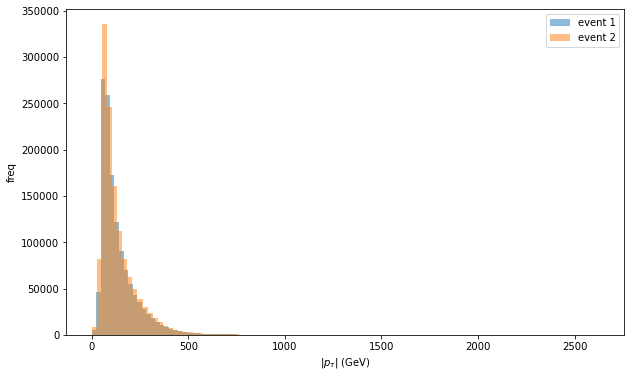

In [17]:
plt.figure(figsize=(10,6))
plt.hist(tau_1.p, bins=100, alpha=0.5, label='event 1')
plt.hist(tau_2.p, bins=100, alpha=0.5, label='event 2')
plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
# plt.title('using closest to 125GeV (deriv solution)')
plt.show()

In [18]:
def normaliseVector(vec):
        """
        
        Normalises an array of vectors
        """
        return vec/np.sqrt((vec ** 2).sum(-1))[..., np.newaxis]

In [19]:
np.array(sol1_p).T, np.array(sol1_w).T, np.array(closest_p_1), tau_1.p.T, 

(array([[ 73.95066513,  65.13199892],
        [226.13523462, 169.81083726],
        [166.36093443,  77.65715372],
        ...,
        [155.98656082, 124.48606609],
        [805.74514041, 277.113633  ],
        [102.31002304,  51.07940607]]),
 array([[ 52.58423396,  52.58166661],
        [164.65030841, 164.65012105],
        [ 75.12879585,  75.12735269],
        ...,
        [103.6387198 , 103.6380388 ],
        [276.70816981, 276.70805511],
        [ 42.60858194,  42.60361268]]),
 array([ 73.95066513, 169.81083726, 166.36093443, ..., 124.48606609,
        277.113633  , 102.31002304]),
 array([ 65.01384948, 226.371089  ,  77.65262666, ..., 124.37211884,
        277.11326892, 102.43977842]))

In [20]:
a1_1_z = np.c_[a1_1.p_x, a1_1.p_y, a1_1.p_z]
a1_2_z = np.c_[a1_2.p_x, a1_2.p_y, a1_2.p_z]
sv_1 = np.c_[df_gen['sv_x_1'], df_gen['sv_y_1'], df_gen['sv_z_1']]
sv_2 = np.c_[df_gen['sv_x_2'], df_gen['sv_y_2'], df_gen['sv_z_2']]

In [21]:
angles = np.arccos(np.einsum('ij, ij->i', normaliseVector(a1_1_z), normaliseVector(sv_1)))

In [34]:
angles_2 = np.arccos(np.einsum('ij, ij->i', normaliseVector(a1_2_z), normaliseVector(sv_2)))

In [36]:
(angles_2 > np.pi/2).sum()

33

In [52]:
(sol1_p[0]>=sol1_p[1]).sum()/len(sol1_p[0])

1.0

In [28]:
real_soln_idx_1 = np.argmin(np.abs(np.subtract(np.array(sol1_p).T, tau_1.p[:, None])), axis=1)
closest_soln_idx_1 = get_closest_soln_idx(np.array(sol1_p).T)

getting 0 idx
getting 100000 idx
getting 200000 idx
getting 300000 idx
getting 400000 idx
getting 500000 idx
getting 600000 idx
getting 700000 idx
getting 800000 idx
getting 900000 idx
getting 1000000 idx
getting 1100000 idx
getting 1200000 idx
getting 1300000 idx


In [32]:
(closest_soln_idx_1 == real_soln_idx_1).sum()/len(real_soln_idx_1)

0.5780222287384191

In [24]:
real_soln_idx_1.sum()/len(real_soln_idx_1)

0.6079331040074356

In [122]:
for i in range(40):
    print(np.array(sol1_p).T[i], tau_1.p[i], theta_1[i], real_soln_idx[i])

[73.95066513 65.13199892] 65.01384948474478 0.007970311138646909 1
[226.13523462 169.81083726] 226.3710889990615 0.0009806125778933014 0
[166.36093443  77.65715372] 77.6526266593712 0.0031627087336382246 1
[180.6714491   76.24972965] 76.24702983142333 0.002679177679586995 1
[57.42086019 50.31765209] 50.244198054699105 0.008713206854031935 1
[86.7145275  63.03470342] 62.989564667946176 0.009071579068539806 1
[375.33300415 127.07995091] 127.07902087492488 0.000860519890090562 1
[69.88264372 56.06406939] 56.02669918787317 0.006943774211176616 1
[508.25580674 227.335993  ] 227.376188399662 0.0007108759447261305 1
[188.28036507 114.74321007] 114.69846780352319 0.004004009924393959 1
[30.99225109 22.39246466] 22.382804356697516 0.018236709465926666 1
[21.77013981 15.17890014] 15.172072280373623 0.02973832539441509 1
[127.02069224  76.54608809] 127.1417939152299 0.0020726694072330993 0
[109.04341705  65.07487143] 65.05164019648778 0.007723892081358721 1
[85.16067781 65.11553246] 65.0948961979

In [42]:
sol1_p[0]

array([ 73.95066513, 226.13523462, 166.36093443, ..., 155.98656082,
       805.74514041, 102.31002304])

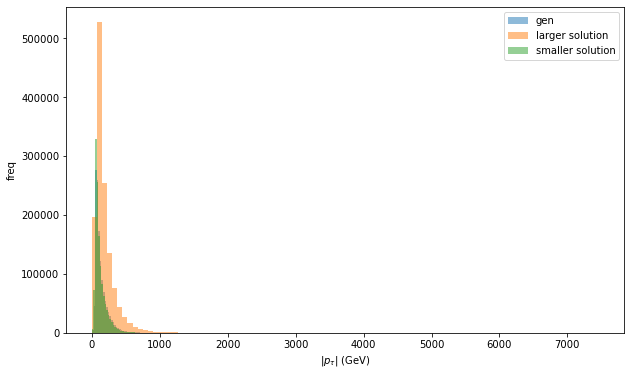

In [43]:
plt.figure(figsize=(10,6))
plt.hist(tau_1.p, bins=100, alpha=0.5, label='gen')
plt.hist(sol1_p[0], bins=100, alpha=0.5, label='larger solution')
plt.hist(sol1_p[1], bins=100, alpha=0.5, label='smaller solution')
plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
# plt.title('using closest to 125GeV (deriv solution)')
plt.savefig('tau_reconstruction/gen_dist.png')
plt.show()

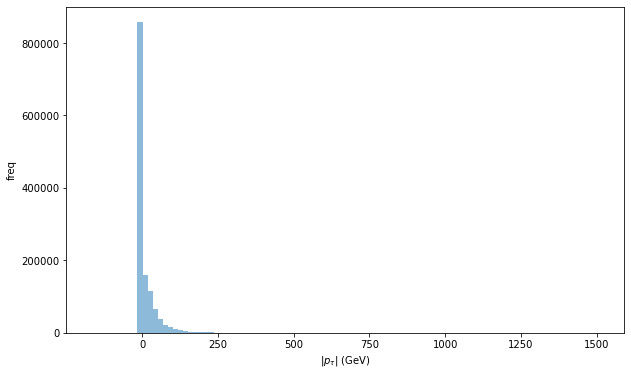

In [101]:
plt.figure(figsize=(10,6))
plt.hist(tau_1.p-sol1_p[1], bins=100, alpha=0.5)
# plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
# plt.title('using closest to 125GeV (deriv solution)')
plt.show()

In [103]:
from scipy import stats
stats.describe(tau_1.p-sol1_p[1])

DescribeResult(nobs=1306147, minmax=(-165.80465175155837, 1507.5290108127945), mean=13.795127325205197, variance=1083.2798655718066, skewness=5.02490002327698, kurtosis=47.429610566294116)

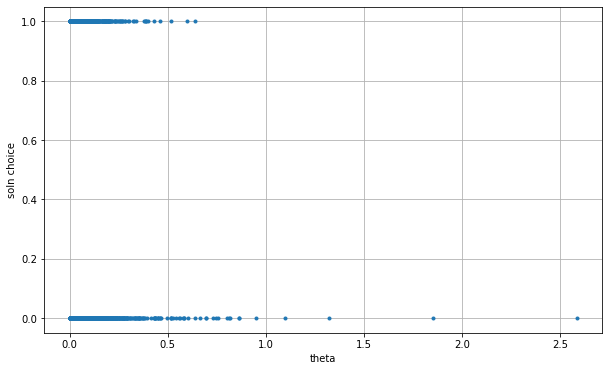

In [37]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(10,6))
plt.plot(angles, real_soln_idx, '.')
plt.xlabel('theta')
plt.grid()
plt.ylabel('soln choice')
plt.savefig('tau_reconstruction/soln_picking_theta.png')
plt.show()


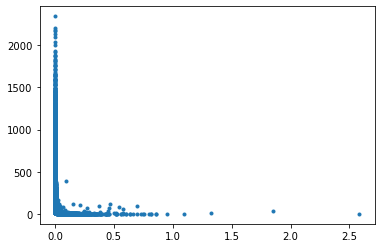

In [124]:
plt.plot(angles, tau_1.p, '.')
plt.show()

In [46]:
np.array(sol1_p).T

array([[ 73.95066513,  65.13199892],
       [226.13523462, 169.81083726],
       [166.36093443,  77.65715372],
       ...,
       [155.98656082, 124.48606609],
       [805.74514041, 277.113633  ],
       [102.31002304,  51.07940607]])

In [55]:
sv_1_norm, sol1_p[0]

(array([[-0.810503  , -0.35227609,  0.46795988],
        [-0.08768452, -0.21300197, -0.97310924],
        [ 0.75435491, -0.43180689, -0.49446079],
        ...,
        [ 0.28592847,  0.40538647, -0.86827802],
        [ 0.10993102,  0.48847503, -0.86562539],
        [-0.51897968,  0.36407199, -0.7733768 ]]),
 array([ 73.95066513, 226.13523462, 166.36093443, ..., 155.98656082,
        805.74514041, 102.31002304]))

In [52]:
tau_1_1 = sol1_p[0][:,None]*sv_1_norm

In [53]:
tau_1_1

array([[ -59.9372358 ,  -26.0510513 ,   34.60594405],
       [ -19.82855996,  -48.16724988, -220.05428554],
       [ 125.49518772,  -71.83579813,  -82.25895982],
       ...,
       [  44.60099937,   63.23484156, -135.4397018 ],
       [  88.57638447,  393.58637897, -697.47345304],
       [ -53.09682319,   37.24821329,  -79.1241985 ]])

In [72]:
vectors = np.array([tau_1_1[0], ])
vector_addition = vectors[0] + vectors[1]
vectors = np.append(vectors, vector_addition[None,:], axis=0)
 

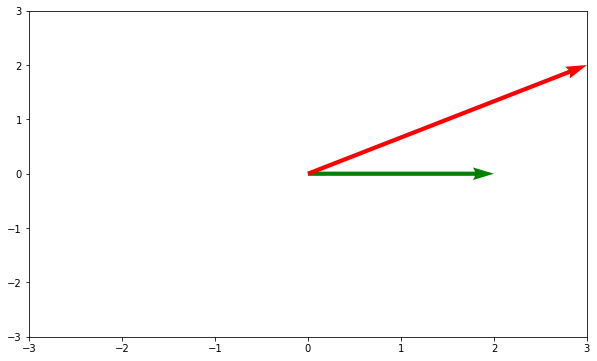

In [91]:
plt.figure(figsize=(10,6))
origin = np.array([0, 0]) # origin point
plt.quiver(origin, origin,
           vectors[:, 0],
           vectors[:, 1],
           scale=1,
           scale_units='xy',
           angles = 'xy',
           color=['g', 'r', 'k'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [85]:
vectors[:, 0], vectors[:, 1]

(array([2, 3]), array([0, 2]))

In [81]:
X, Y, U, V

((0, 0, 0), (0, 0, 0), (3, 1, 9), (2, 1, 9))